In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from api_keys import datagov_api_key
import math

In [2]:
six_yr_school_costs = pd.read_csv('six_yr_school_costs.csv')
six_yr_school_costs.head(3)

,id,school.name,latest.cost.attendance.academic_year,location.lat,location.lon,latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.6_yrs_after_entry.working_not_enrolled.overall,Std Error of Mean
0,459842,Herzing University-Kenosha,26772.0,42.603889,-87.857452,30100.0,20500.0,2348.0,423.062776
1,457022,Herzing University-Toledo,26916.0,41.639266,-83.665453,30100.0,20500.0,2348.0,423.062776
2,184694,Fairleigh Dickinson University-Florham Campus,53748.0,40.774498,-74.432121,42300.0,29100.0,1926.0,663.078349


In [3]:
seven_yr_school_costs = pd.read_csv('seven_yr_school_costs.csv')
seven_yr_school_costs.head(3)

,id,school.name,latest.cost.attendance.academic_year,location.lat,location.lon,latest.earnings.7_yrs_after_entry.mean_earnings,latest.earnings.7_yrs_after_entry.std_dev,latest.earnings.7_yrs_after_entry.working_not_enrolled,Std Error of Mean
0,459842,Herzing University-Kenosha,26772.0,42.603889,-87.857452,37800.0,23100.0,465.0,1071.236849
1,457022,Herzing University-Toledo,26916.0,41.639266,-83.665453,37800.0,23100.0,465.0,1071.236849
2,184694,Fairleigh Dickinson University-Florham Campus,53748.0,40.774498,-74.432121,43600.0,30800.0,1718.0,743.086099


In [4]:
eight_yr_school_costs = pd.read_csv('eight_yr_school_costs.csv')
eight_yr_school_costs.head(3)

,id,school.name,latest.cost.attendance.academic_year,location.lat,location.lon,latest.earnings.8_yrs_after_entry.mean_earnings,latest.earnings.8_yrs_after_entry.std_deviation,latest.earnings.8_yrs_after_entry.working_not_enrolled,Std Error of Mean
0,459842,Herzing University-Kenosha,26772.0,42.603889,-87.857452,35100.0,24200.0,1530.0,618.685091
1,457022,Herzing University-Toledo,26916.0,41.639266,-83.665453,35100.0,24200.0,1530.0,618.685091
2,184694,Fairleigh Dickinson University-Florham Campus,53748.0,40.774498,-74.432121,48800.0,35400.0,2027.0,786.278477


In [5]:
ten_yr_school_costs = pd.read_csv('ten_yr_school_costs.csv')
ten_yr_school_costs.head(3)

,id,school.name,latest.cost.attendance.academic_year,location.lat,location.lon,latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.10_yrs_after_entry.working_not_enrolled.overall,Std Error of Mean
0,459842,Herzing University-Kenosha,26772.0,42.603889,-87.857452,41600.0,27900.0,788.0,993.896347
1,457022,Herzing University-Toledo,26916.0,41.639266,-83.665453,41600.0,27900.0,788.0,993.896347
2,184694,Fairleigh Dickinson University-Florham Campus,53748.0,40.774498,-74.432121,54400.0,44900.0,2006.0,1002.491910


In [6]:
six_yr_school_costs['Mean Earnings minus 1-year Cost'] = six_yr_school_costs.iloc[:, 5] - six_yr_school_costs.iloc[:, 2]
seven_yr_school_costs['Mean Earnings minus 1-year Cost'] = seven_yr_school_costs.iloc[:, 5] - seven_yr_school_costs.iloc[:, 2]
eight_yr_school_costs['Mean Earnings minus 1-year Cost'] = eight_yr_school_costs.iloc[:, 5] - eight_yr_school_costs.iloc[:, 2]
ten_yr_school_costs['Mean Earnings minus 1-year Cost'] = ten_yr_school_costs.iloc[:, 5] - ten_yr_school_costs.iloc[:, 2]


In [7]:
six_means = six_yr_school_costs['Mean Earnings minus 1-year Cost']
six_sds = six_yr_school_costs['latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev']
six_samps = six_yr_school_costs['latest.earnings.6_yrs_after_entry.working_not_enrolled.overall']

seven_means = seven_yr_school_costs['Mean Earnings minus 1-year Cost']
seven_sds = seven_yr_school_costs['latest.earnings.7_yrs_after_entry.std_dev']
seven_samps = seven_yr_school_costs['latest.earnings.7_yrs_after_entry.working_not_enrolled']

eight_means = eight_yr_school_costs['Mean Earnings minus 1-year Cost']
eight_sds = eight_yr_school_costs['latest.earnings.8_yrs_after_entry.std_deviation']
eight_samps = eight_yr_school_costs['latest.earnings.8_yrs_after_entry.working_not_enrolled']

ten_means = ten_yr_school_costs['Mean Earnings minus 1-year Cost']
ten_sds = ten_yr_school_costs['latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev']
ten_samps = ten_yr_school_costs['latest.earnings.10_yrs_after_entry.working_not_enrolled.overall']

In [8]:
six_yr_school_costs['Std Error of (Earnings Mean-Cost)'] = six_sds / six_samps.apply(np.sqrt)

seven_yr_school_costs['Std Error of (Earnings Mean-Cost)'] = seven_sds / seven_samps.apply(np.sqrt)

eight_yr_school_costs['Std Error of (Earnings Mean-Cost)'] = eight_sds / eight_samps.apply(np.sqrt)

ten_yr_school_costs['Std Error of (Earnings Mean-Cost)'] = ten_sds / ten_samps.apply(np.sqrt)

In [9]:
x_axis = (six_yr_school_costs['latest.cost.attendance.academic_year']).values

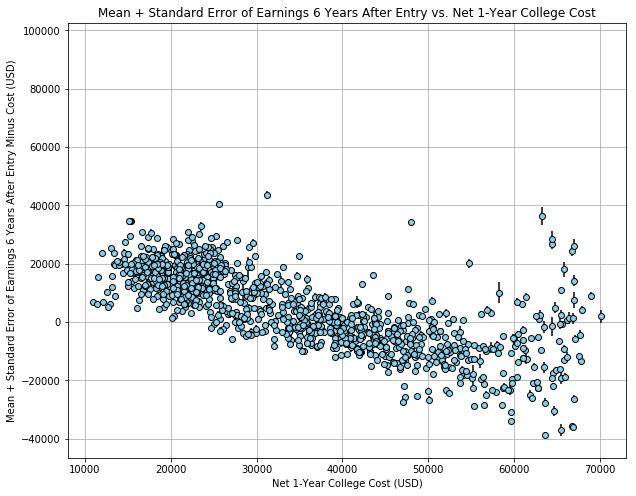

In [10]:
six_means_ls = six_means.tolist()
six_sems_ls = six_yr_school_costs['Std Error of (Earnings Mean-Cost)'].tolist()

fig6, ax6 = plt.subplots(figsize=(10,8))

ax6.errorbar(x_axis, six_means_ls, six_sems_ls, fmt="o", color='skyblue', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 6 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 6 Years After Entry Minus Cost (USD)')
plt.grid()
plt.ylim(-46560,102540);

#plt.savefig('6yr_earnings_v_cost.png')

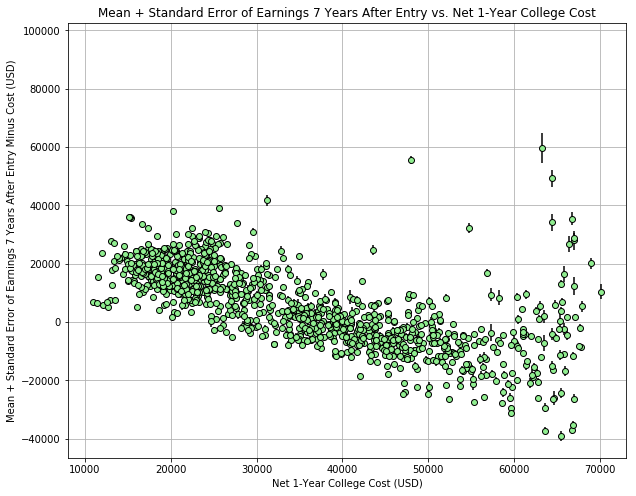

In [11]:
seven_means_ls = seven_means.tolist()
seven_sems_ls = seven_yr_school_costs['Std Error of (Earnings Mean-Cost)'].tolist()

fig7, ax7 = plt.subplots(figsize=(10,8))

ax7.errorbar(x_axis, seven_means_ls, seven_sems_ls, fmt="o", color='lightgreen', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 7 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 7 Years After Entry Minus Cost (USD)')
plt.grid()
plt.ylim(-46560,102540);

#plt.savefig('7yr_earnings_v_cost.png')


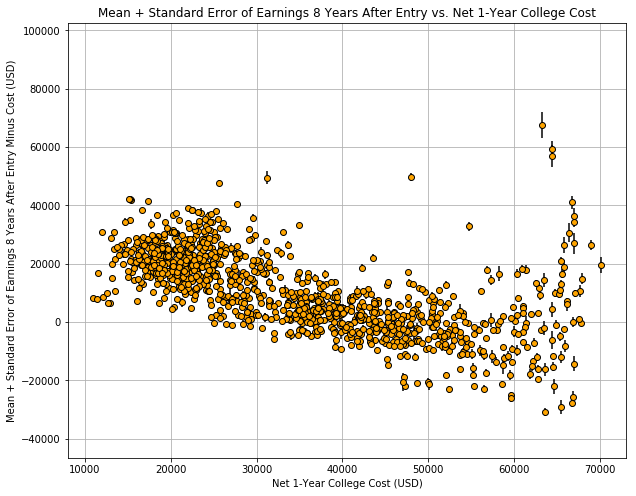

In [12]:
eight_means_ls = eight_means.tolist()
eight_sems_ls = eight_yr_school_costs['Std Error of (Earnings Mean-Cost)'].tolist()

fig8, ax8 = plt.subplots(figsize=(10,8))

ax8.errorbar(x_axis, eight_means_ls, eight_sems_ls, fmt="o", color='orange', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 8 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 8 Years After Entry Minus Cost (USD)')
plt.grid()
plt.ylim(-46560,102540);

#plt.savefig('8yr_earnings_v_cost.png')

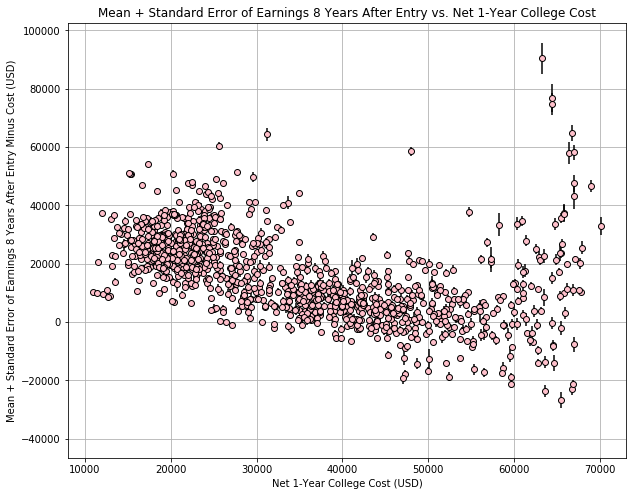

In [13]:
ten_means_ls = ten_means.tolist()
ten_sems_ls = ten_yr_school_costs['Std Error of (Earnings Mean-Cost)'].tolist()

fig10, ax10 = plt.subplots(1, figsize=(10,8))

ax10.errorbar(x_axis, ten_means_ls, ten_sems_ls, fmt="o", color='pink', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 8 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 8 Years After Entry Minus Cost (USD)')
plt.grid()
plt.ylim(-46560,102540);

#plt.savefig('10yr_earnings_v_cost.png')

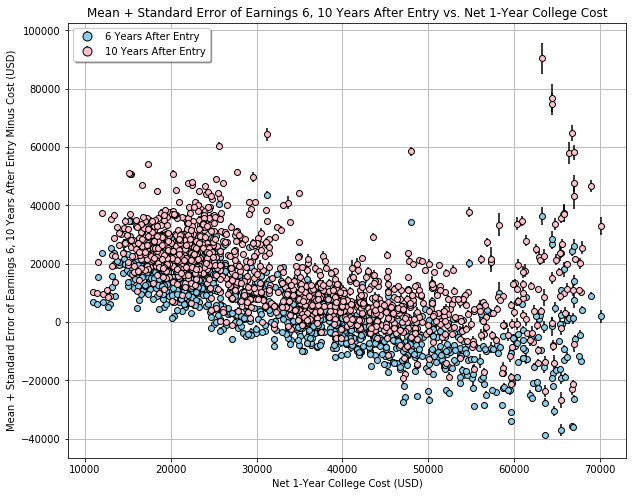

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(x_axis, six_means_ls, six_sems_ls, fmt="o", color='skyblue', markeredgecolor='black', ecolor='black');
# ax.errorbar(x_axis, seven_means_ls, seven_sems_ls, fmt="o", color='lightgreen', markeredgecolor='black', ecolor='black');
# ax.errorbar(x_axis, eight_means_ls, eight_sems_ls, fmt="o", color='orange', markeredgecolor='black', ecolor='black');
ax.errorbar(x_axis, ten_means_ls, ten_sems_ls, fmt="o", color='pink', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 6, 10 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 6, 10 Years After Entry Minus Cost (USD)')
plt.grid()
plt.legend(['6 Years After Entry', '10 Years After Entry'], markerscale=1.5, shadow=True)
plt.ylim(-46560,102540);

#plt.savefig('6v10yr_earnings_v_cost.png')
